In [1]:
%pylab 
# this imports numpy and matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

# import functions for processing CHIME data
from ch_util import andata
from ch_util import data_index
from ch_util import ephemeris
from ch_util import ni_utils
from ch_util import layout
#ch_util package is prepared by CHIME
# import other functions we need
from datetime import datetime
from datetime import timedelta
import numpy as np
from matplotlib import pyplot as plt
from glob import glob

plt.rcParams["figure.figsize"] = (16, 12)
plt.rcParams["font.size"] = 16

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
data_index.connect_database()
layout.set_user('Sidhant')
f = data_index.Finder(node_spoof = {"gong" : "/mnt/gong/archive"})

In [3]:
#f?
f.accept_all_global_flags()
# stored on gong
f.filter_acqs((data_index.ArchiveInst.name == 'chime')) # The cables test is connected to the pathfinder
#f.only_corr()
t0 = (datetime(2017,10,12) + timedelta(hours=7)) 
t2 = (datetime(2017,10,13) + timedelta(hours=7)) 
f.set_time_range(t0,t2)
path = f.print_results_summary() # Shows acquisitions during that period
results_list = f.get_results()
f=0

   # | acquisition                          |start (s)| len (s) |files |     MB 
   0 | 20171011T231455Z_chime_rawadc        |   27876 |   42883 |   11 |   3173
Total  42883 seconds,   3173 MB of data.


folder number 0 and files in directory 11
(130,)
(130,)
(130,)
(130,)
(130,)
(130,)
(130,)
(130,)
(130,)
(130,)
(130,)
(130,)
(130,)
(130,)
(130,)
(130,)
(130,)
(130,)
(130,)
(130,)
(130,)
(130,)


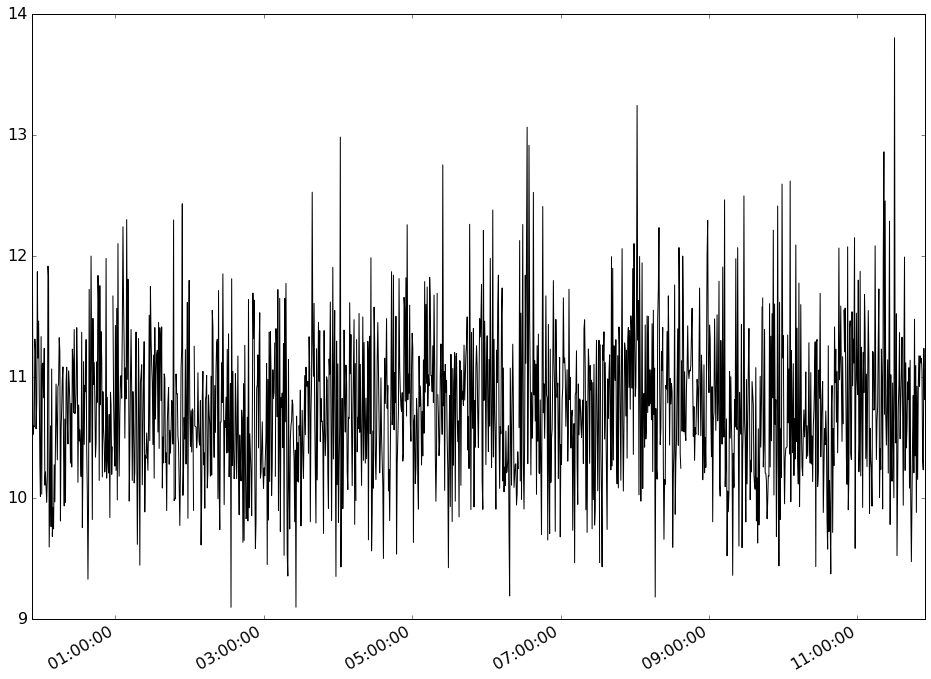

In [9]:
for j in range(len(results_list)):
    data_dir = results_list[j][0]
    print('folder number %i and files in directory %i' %(j,len(data_dir)))
    for k in range(len(data_dir)):
        raw_data = andata.RawADCData.from_file(data_dir[k])
        c, s, i = (3,1,1)
        input_slice = np.where(np.logical_not((raw_data['slot'][:] != s) + (raw_data['crate'][:] != c) + (raw_data['adc_input'][:] != i)))[0]
        rms = np.zeros(len(input_slice))   
        for i in range(len(input_slice)):
                rms[i] = np.std(raw_data['timestream'][input_slice[i],:])
        
        time = raw_data['timestamp'][input_slice[:],0]
        t=[dd[1] for dd in np.array(time)]
        dtime = np.array([(ephemeris.unix_to_datetime(time)+timedelta(hours=-7)) for time in t])
        plt.figure(1)
        plt.plot(dtime,rms,'k')
        plt.gcf().autofmt_xdate()
        

In [ ]:
colors=['r','g','b','k','c','y','m']
col=0
rms0=[]
rms1=[]
rms2=[]
rms3=[]
time=[]
for j in range(len(results_list)):
    data_dir = results_list[j][0]
    print('folder number %i and files in directory %i' %(j,len(data_dir)))
    for k in range(len(data_dir)):
        raw_data = andata.RawADCData.from_file(data_dir[k])
        c, s, i = [(1,3,3,0),(9,1,8,0),(11,1,15,5)]
        for kk in range(4):
            input_slice = np.where(np.logical_not((raw_data['slot'][:] != s[k]) + (raw_data['crate'][:] != c[k]) + (raw_data['adc_input'][:] != i[k])))[0]
            if kk==0:
                for i in range(len(input_slice)):
                    rms0.append(np.std(raw_data['timestream'][input_slice[i],:]))
                    #rms[i] = np.std(raw_data['timestream'][input_slice[i],:])
            if kk==1:
                for i in range(len(input_slice)):
                    rms1.append(np.std(raw_data['timestream'][input_slice[i],:]))
            if kk==2:
                for i in range(len(input_slice)):
                    rms2.append(np.std(raw_data['timestream'][input_slice[i],:]))
            if kk==3:
                for i in range(len(input_slice)):
                    rms3.append(np.std(raw_data['timestream'][input_slice[i],:]))

        time = raw_data['timestamp'][input_slice[:],0]
        
        '''
        t=[dd[1] for dd in np.array(time)]
        dtime = np.array([(ephemeris.unix_to_datetime(time)+timedelta(hours=-7)) for time in t])
        plt.figure(1)
        plt.plot(dtime,rms,'k')
        plt.gcf().autofmt_xdate()
        '''